In [0]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# 디렉토리 변경
import os
os.chdir('drive/My Drive/Colab Notebooks/DACON/AIFrenz_Season2/')

In [0]:
# data 불러오기
import numpy as np
train = np.load('./Data/dacon_npy/train.npy')

In [0]:
train.shape

(76345, 40, 40, 15)

In [0]:
# 파일 총 개수
sum([1 for i in range(train.shape[0])])

In [0]:
# nan 개수 
sum([1 for i in range(train.shape[0]) if (train[i, :, :, -1] < 0).sum()])

In [0]:
import pandas as pd

In [0]:
# 강수량 있는 픽셀 개수 세기
s = pd.Series([(train[i, :, :, -1] > 0).sum() for i in range(train.shape[0])])
s.value_counts().plot(kind='hist', range=[0, 1600])

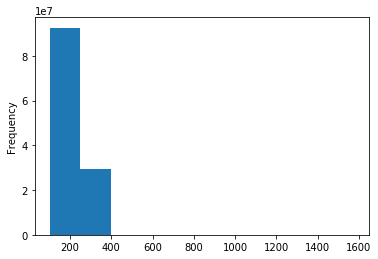

In [0]:
pd.Series(train[:, :, :, 0].reshape(-1,)).plot(kind='hist')

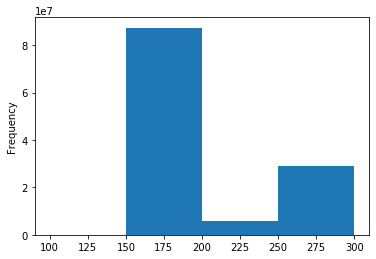

In [0]:
pd.Series(train[:, :, :, 0].reshape(-1,)).plot(kind='hist', bins=np.arange(100, 350, 50))

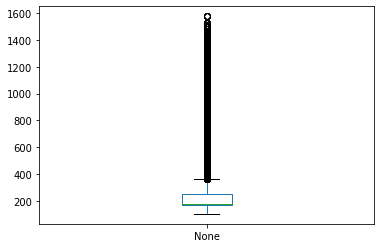

In [0]:
pd.Series(train[:, :, :, 0].reshape(-1,)).plot(kind='box')

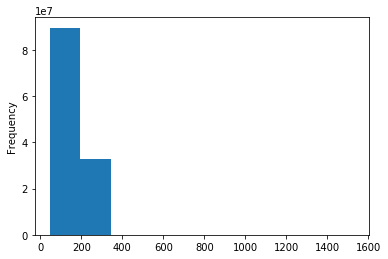

In [0]:
pd.Series(train[:, :, :, 1].reshape(-1,)).plot(kind='hist')

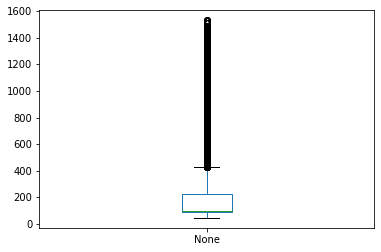

In [0]:
pd.Series(train[:, :, :, 1].reshape(-1,)).plot(kind='box')

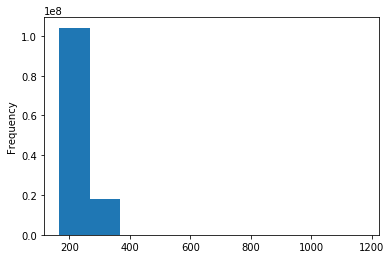

In [0]:
pd.Series(train[:, :, :, 2].reshape(-1,)).plot(kind='hist')

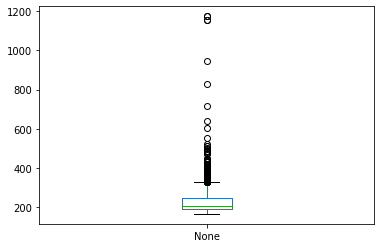

In [0]:
pd.Series(train[:, :, :, 2].reshape(-1,)).plot(kind='box')

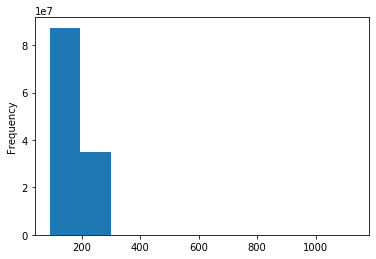

In [0]:
pd.Series(train[:, :, :, 3].reshape(-1,)).plot(kind='hist')

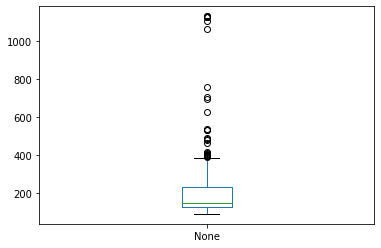

In [0]:
pd.Series(train[:, :, :, 3].reshape(-1,)).plot(kind='box')

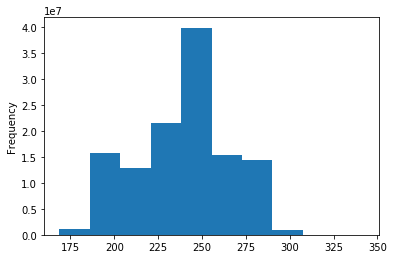

In [0]:
pd.Series(train[:, :, :, 4].reshape(-1,)).plot(kind='hist')

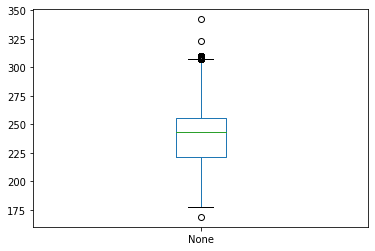

In [0]:
pd.Series(train[:, :, :, 4].reshape(-1,)).plot(kind='box')

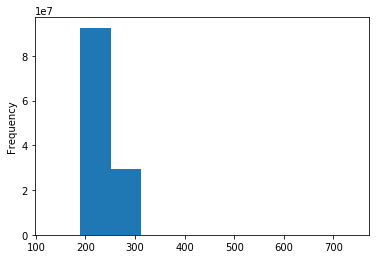

In [0]:
pd.Series(train[:, :, :, 5].reshape(-1,)).plot(kind='hist')

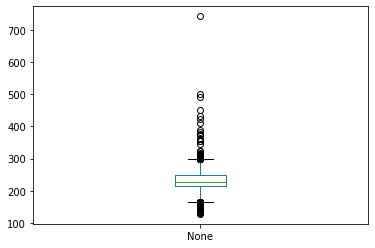

In [0]:
pd.Series(train[:, :, :, 5].reshape(-1,)).plot(kind='box')

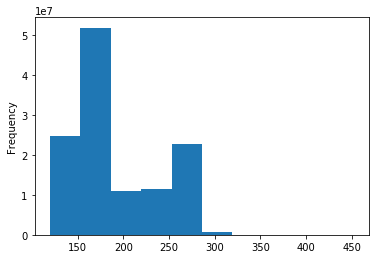

In [0]:
pd.Series(train[:, :, :, 6].reshape(-1,)).plot(kind='hist')

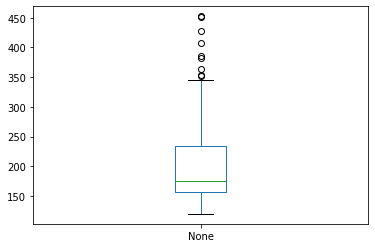

In [0]:
pd.Series(train[:, :, :, 6].reshape(-1,)).plot(kind='box')

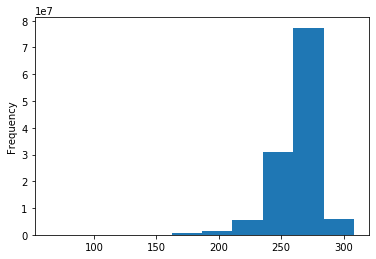

In [0]:
pd.Series(train[:, :, :, 7].reshape(-1,)).plot(kind='hist')

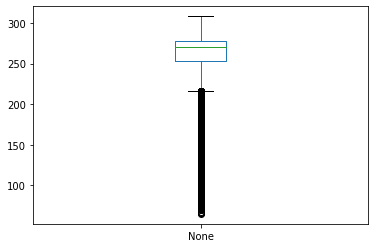

In [0]:
pd.Series(train[:, :, :, 7].reshape(-1,)).plot(kind='box')

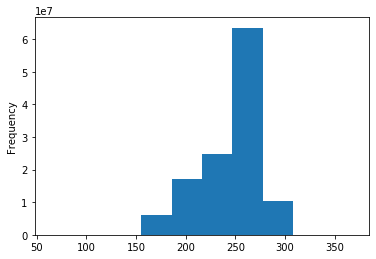

In [0]:
pd.Series(train[:, :, :, 8].reshape(-1,)).plot(kind='hist')

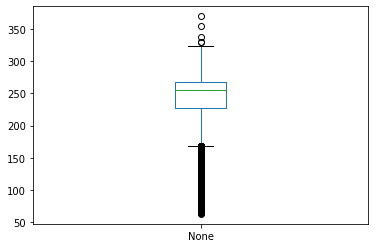

In [0]:
pd.Series(train[:, :, :, 8].reshape(-1,)).plot(kind='box')

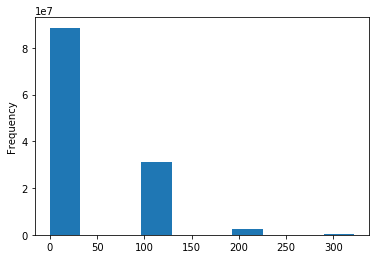

In [0]:
pd.Series(train[:, :, :, 9].reshape(-1,)).plot(kind='hist')

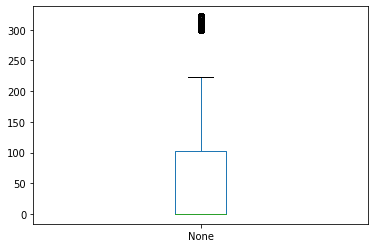

In [0]:
pd.Series(train[:, :, :, 9].reshape(-1,)).plot(kind='box')

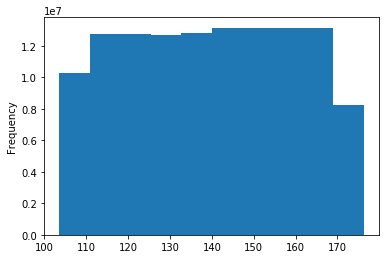

In [0]:
pd.Series(train[:, :, :, 10].reshape(-1,)).plot(kind='hist')

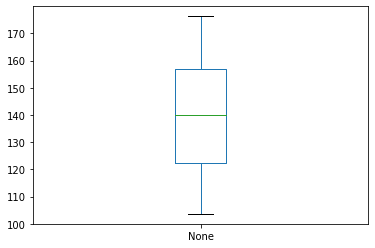

In [0]:
pd.Series(train[:, :, :, 10].reshape(-1,)).plot(kind='box')

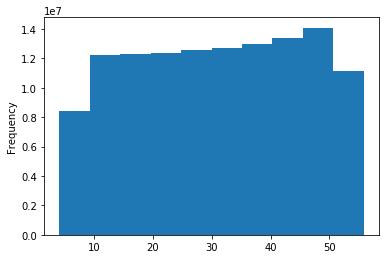

In [0]:
pd.Series(train[:, :, :, 11].reshape(-1,)).plot(kind='hist')

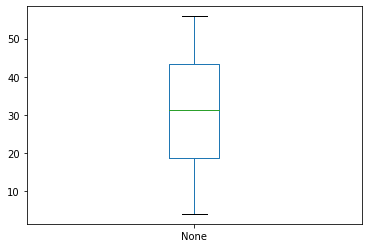

In [0]:
pd.Series(train[:, :, :, 11].reshape(-1,)).plot(kind='box')

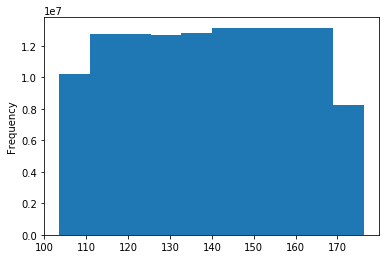

In [0]:
pd.Series(train[:, :, :, 12].reshape(-1,)).plot(kind='hist')

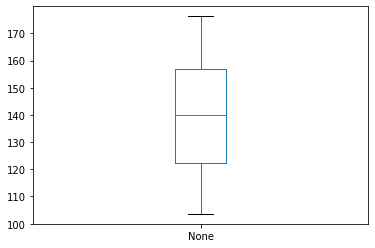

In [0]:
pd.Series(train[:, :, :, 12].reshape(-1,)).plot(kind='box')

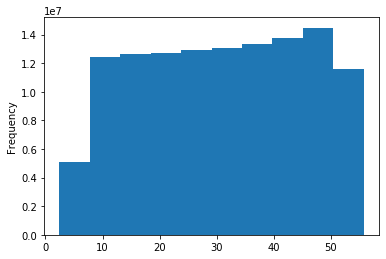

In [0]:
pd.Series(train[:, :, :, 13].reshape(-1,)).plot(kind='hist')

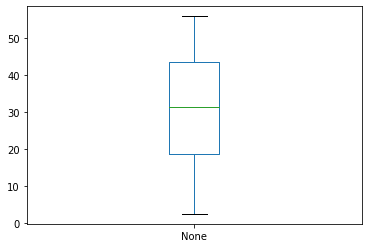

In [0]:
pd.Series(train[:, :, :, 13].reshape(-1,)).plot(kind='box')

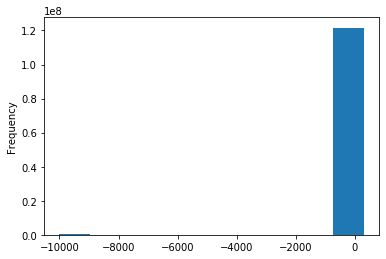

In [0]:
pd.Series(train[:, :, :, 14].reshape(-1,)).plot(kind='hist')

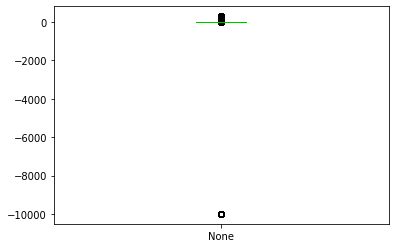

In [0]:
pd.Series(train[:, :, :, 14].reshape(-1,)).plot(kind='box')

In [0]:
train_ = np.delete(train, np.where(train[:, :, :, 14] < 0), axis=0)

In [0]:
train_.shape

(75917, 40, 40, 15)

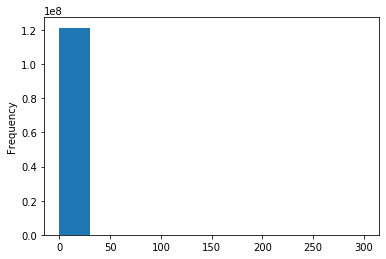

In [0]:
pd.Series(train_[:, :, :, 14].reshape(-1,)).plot(kind='hist')

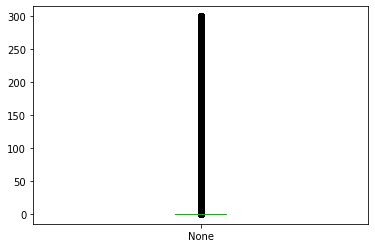

In [0]:
pd.Series(train_[:, :, :, 14].reshape(-1,)).plot(kind='box')

In [0]:
diff_lat = train[:,:,:,10:11] - train[:,:,:,12:13] 
diff_lon = train[:,:,:,11:12] - train[:,:,:,13:14] 
#train_image = np.delete(train_image,[10,11,12,13],axis=3)
#train_image = np.concatenate((train_image,diff_lat,diff_lon),axis=3)

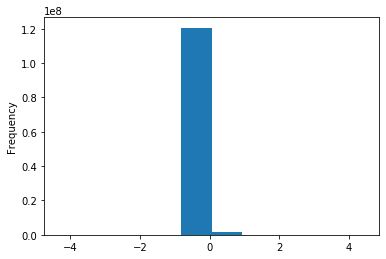

In [0]:
pd.Series(diff_lat.reshape(-1,)).plot(kind='hist')

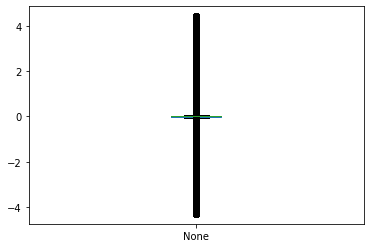

In [0]:
pd.Series(diff_lat.reshape(-1,)).plot(kind='box')

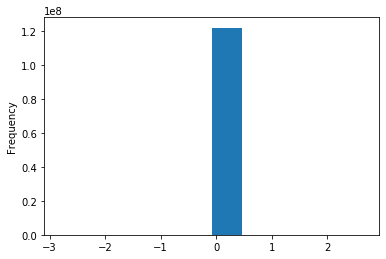

In [0]:
pd.Series(diff_lon.reshape(-1,)).plot(kind='hist')

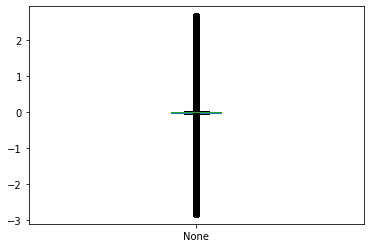

In [0]:
pd.Series(diff_lon.reshape(-1,)).plot(kind='box')

# Robust Scale

In [0]:
from sklearn.preprocessing import RobustScaler

In [0]:
rs = RobustScaler()

In [0]:
train_resize = train.reshape(-1, 15)

In [0]:
train_resize.shape

(122152000, 15)

In [0]:
train_rs = rs.fit_transform(train_resize)

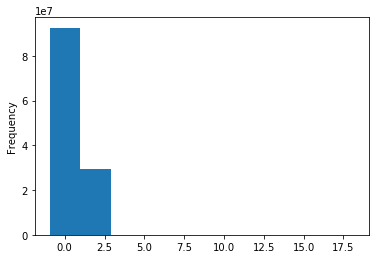

In [0]:
pd.Series(train_rs[:, 0]).plot(kind='hist')

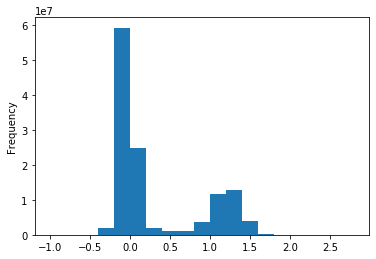

In [0]:
pd.Series(train_rs[:, 0]).plot(kind='hist', bins=np.arange(-1, 3, 0.2))

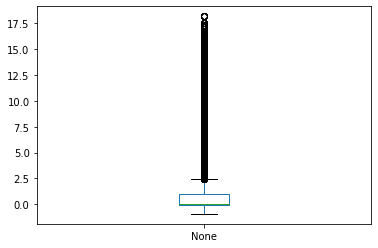

In [0]:
pd.Series(train_rs[:, 0]).plot(kind='box')

---

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss = StandardScaler()

In [0]:
train_ss = ss.fit_transform(train_resize)

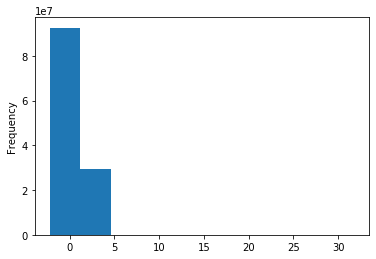

In [0]:
pd.Series(train_ss[:, 0]).plot(kind='hist')

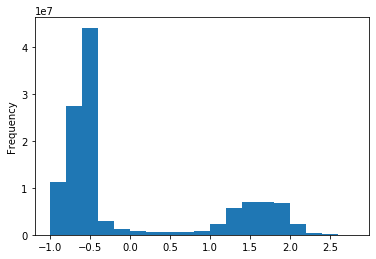

In [0]:
pd.Series(train_ss[:, 0]).plot(kind='hist', bins=np.arange(-1, 3, 0.2))

---

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
mms = MinMaxScaler()

In [0]:
train_mms = mms.fit_transform(train_resize)

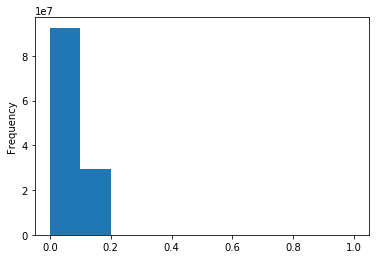

In [0]:
pd.Series(train_mms[:, 0]).plot(kind='hist')

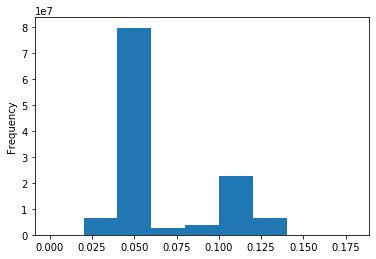

In [0]:
pd.Series(train_mms[:, 0]).plot(kind='hist', bins=np.arange(0, 0.2, 0.02))

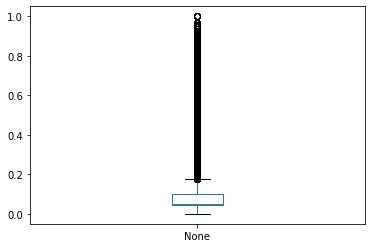

In [0]:
pd.Series(train_mms[:, 0]).plot(kind='box')